# IMPORT MAIN LIBRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import Dataset

<ul>
    <li><b>Ticket ID</b>: A unique identifier for each ticket.</li>
<li><b>Customer Name</b>: The name of the customer who raised the ticket.</li>
<li><b>Customer Email</b>: The email address of the customer (Domain name - @example.com is intentional for user data privacy concern).</li>
<li><b>Customer Age</b>: The age of the customer.</li>
<li><b>Customer Gender</b>: The gender of the customer.</li>
<li><b>Product Purchased</b>: The tech product purchased by the customer.</li>
<li><b>Date of Purchase</b>: The date when the product was purchased.</li>
<li><b>Ticket Type</b>: The type of ticket (e.g., technical issue, billing inquiry, product inquiry).</li>
<li><b>Ticket Subject</b>: The subject/topic of the ticket.</li>
<li><b>Ticket Description</b>: The description of the customer's issue or inquiry.</li>
<li><b>Ticket Status</b>: The status of the ticket (e.g., open, closed, pending customer response).</li>
<li><b>Resolution</b>: The resolution or solution provided for closed tickets.</li>
<li><b>Ticket Priority</b>: The priority level assigned to the ticket (e.g., low, medium, high, critical).</li>
<li><b>Ticket Channel</b>: The channel through which the ticket was raised (e.g., email, phone, chat, social media).</li>
<li><b>First Response Time</b>: The time taken to provide the first response to the customer.</li>
<li><b>Time to Resolution</b>: The time taken to resolve the ticket.</li>
<li><b>Customer Satisfaction Rating</b>: The customer's satisfaction rating for closed tickets (on a scale of 1 to 5).</li>
    </ul>

In [3]:
cs_data = pd.read_csv('../raw_data/customer_support_tickets.csv')

In [5]:
cs_data.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


💡 Initial Check on DF

In [7]:
#NULL VALUES

cs_data.isnull().sum()

Ticket ID                          0
Customer Name                      0
Customer Email                     0
Customer Age                       0
Customer Gender                    0
Product Purchased                  0
Date of Purchase                   0
Ticket Type                        0
Ticket Subject                     0
Ticket Description                 0
Ticket Status                      0
Resolution                      5700
Ticket Priority                    0
Ticket Channel                     0
First Response Time             2819
Time to Resolution              5700
Customer Satisfaction Rating    5700
dtype: int64

In [16]:
#total tickets and tickets without a response
f'{cs_data.shape[0]} total tickets being that {round(5700/cs_data.shape[0], 1)*100}% don\'t have a resolution'

"8469 total tickets being that 70.0% don't have a resolution"

In [17]:
#breakdown on ticket status

cs_data['Ticket Status'].unique()

array(['Pending Customer Response', 'Closed', 'Open'], dtype=object)

In [29]:
pending_customer_tickets = len(cs_data[cs_data['Ticket Status'] =='Pending Customer Response'])

f'{pending_customer_tickets} pending tickets, {round(pending_customer_tickets/cs_data.shape[0], 2)*100}%'

'2881 pending tickets, 34.0%'

In [28]:
closed_tickets = len(cs_data[cs_data['Ticket Status'] =='Closed'])

f'{closed_tickets} pending tickets, {round(closed_tickets/cs_data.shape[0], 2)*100}%'

'2769 pending tickets, 33.0%'

In [30]:
open_tickets = len(cs_data[cs_data['Ticket Status'] =='Open'])

f'{open_tickets} pending tickets, {round(open_tickets/cs_data.shape[0], 2)*100}%'

'2819 pending tickets, 33.0%'

# AGES OF CONTACT

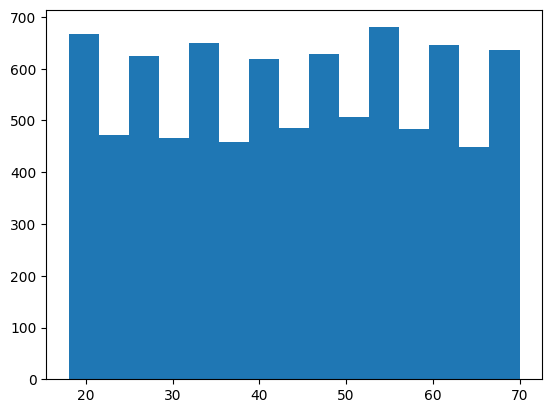

In [39]:
plt.hist(cs_data['Customer Age'], bins=15);

In [44]:
cs_data['Customer Gender'].unique()

array(['Other', 'Female', 'Male'], dtype=object)

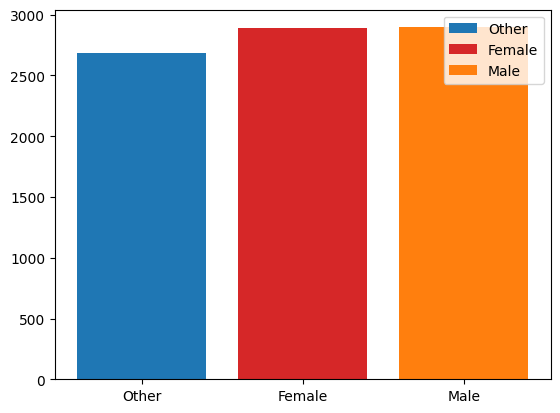

In [51]:
x = ['Other', 'Female', 'Male']

y = [len(cs_data[cs_data['Customer Gender'] =='Other']), len(cs_data[cs_data['Customer Gender'] =='Female']),\
    len(cs_data[cs_data['Customer Gender'] =='Male'])]

bar_label = ['Other', 'Female', 'Male']
bar_colors = ['tab:blue', 'tab:red', 'tab:orange']

plt.bar(x, y, label=bar_label, color=bar_colors)
plt.legend()

In [53]:
#type of product

cs_data['Product Purchased'].value_counts()

Product Purchased
Canon EOS                         240
GoPro Hero                        228
Nest Thermostat                   225
Philips Hue Lights                221
Amazon Echo                       221
LG Smart TV                       219
Sony Xperia                       217
Roomba Robot Vacuum               216
Apple AirPods                     213
LG OLED                           213
iPhone                            212
Sony 4K HDR TV                    210
Garmin Forerunner                 208
LG Washing Machine                208
Canon DSLR Camera                 206
Nikon D                           204
Nintendo Switch Pro Controller    203
Google Pixel                      203
Fitbit Charge                     202
Sony PlayStation                  202
HP Pavilion                       200
Microsoft Office                  200
Amazon Kindle                     198
Google Nest                       198
Dyson Vacuum Cleaner              198
Bose SoundLink Speaker          

In [54]:
cs_data['Ticket Type'].value_counts()

Ticket Type
Refund request          1752
Technical issue         1747
Cancellation request    1695
Product inquiry         1641
Billing inquiry         1634
Name: count, dtype: int64

In [55]:
cs_data['Ticket Priority'].value_counts()

Ticket Priority
Medium      2192
Critical    2129
High        2085
Low         2063
Name: count, dtype: int64

In [56]:
cs_data['Ticket Channel'].value_counts()

Ticket Channel
Email           2143
Phone           2132
Social media    2121
Chat            2073
Name: count, dtype: int64